# Heart Disease Prediction using Machine Learning Algorithms
<br>

## Importing required libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.metrics import auc
from sklearn.metrics import roc_curve

#To ignore unncessary deprecation warnings
import warnings
warnings.filterwarnings('ignore')

### Loading the dataset

In [2]:
data = pd.read_csv('heart.csv')

#checking for missing values
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

There are no missing values. So, there is no need to drop any data and we can proceed further

In [3]:
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


# Data Preprocessing 

### Creating Dummy Variables
Dataset contains Categorical Data so we have to one hot encode these data so that we can use them in model training.<br>
'cp', 'thal' and 'slope' are categorical variables

In [4]:
#One Hot Encoding categorical variables
cp = pd.get_dummies(data['cp'], prefix = "cp", drop_first=True)
thal = pd.get_dummies(data['thal'], prefix = "thal" , drop_first=True)
slope = pd.get_dummies(data['slope'], prefix = "slope", drop_first=True)

>We use drop_first to get k-1 dummies out of k categorical levels by removing the first level

In [5]:
new_data = pd.concat([data, cp, thal, slope], axis=1)

#Dropping original cp,thal,slope columns
new_data.drop(['cp', 'thal', 'slope'], axis=1, inplace=True)
new_data.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,target,cp_1,cp_2,cp_3,thal_1,thal_2,thal_3,slope_1,slope_2
0,63,1,145,233,1,0,150,0,2.3,0,1,0,0,1,1,0,0,0,0
1,37,1,130,250,0,1,187,0,3.5,0,1,0,1,0,0,1,0,0,0
2,41,0,130,204,0,0,172,0,1.4,0,1,1,0,0,0,1,0,0,1
3,56,1,120,236,0,1,178,0,0.8,0,1,1,0,0,0,1,0,0,1
4,57,0,120,354,0,1,163,1,0.6,0,1,0,0,0,0,1,0,0,1


In [6]:
# Splitting target column from dataset
X = new_data.drop(['target'], axis=1)
y = new_data.target

**Normalize the data**
<br>
Feature scaling is a method used to standardize the range of independent variables or features of data.Min-max scaling is the simplest method and consists in rescaling the range of features to scale the range in [0,1].  

<img src="img/normalization.png" />

In [7]:
X = (X - X.min())/(X.max()-X.min())
X.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,cp_1,cp_2,cp_3,thal_1,thal_2,thal_3,slope_1,slope_2
0,0.708333,1.0,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1,0.166667,1.0,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.250000,0.0,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.562500,1.0,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.583333,0.0,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


### Splitting Training and Testing data
We will split our data. 80% of our data will be train data and 20% of it will be test data.

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

<br>

# Tuning and Fitting the Models

## Decision Tree Classifier

In [9]:
from sklearn.tree import DecisionTreeClassifier

#to tune the max_depth attribute
for i in range(1,10):
    dt = DecisionTreeClassifier(max_depth=i)
    dt.fit(X_train, y_train)
    print('max depth : ', i, "score : ", dt.score(X_test, y_test), end="\n")

max depth :  1 score :  0.8360655737704918
max depth :  2 score :  0.8360655737704918
max depth :  3 score :  0.9016393442622951
max depth :  4 score :  0.8360655737704918
max depth :  5 score :  0.7868852459016393
max depth :  6 score :  0.819672131147541
max depth :  7 score :  0.7868852459016393
max depth :  8 score :  0.7868852459016393
max depth :  9 score :  0.7868852459016393


In [10]:
from sklearn.metrics import confusion_matrix

dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

score_dt = round(dt.score(X_test, y_test)*100,3)
print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

cm=confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n",cm)

total=sum(sum(cm))

sensitivity = cm[0,0]/(cm[0,0]+cm[1,0])
print('Sensitivity : ', sensitivity )

specificity = cm[1,1]/(cm[1,1]+cm[0,1])
print('Specificity : ', specificity)

The accuracy score achieved using Decision Tree is: 90.164 %
Confusion Matrix:
 [[28  4]
 [ 2 27]]
Sensitivity :  0.9333333333333333
Specificity :  0.8709677419354839


>Sensitivity and specificity are important metrics especially in healthcare. Sensitivity and specificity are defined as,
>>Sensitivity = TruePositives/TruePositives+FalseNegatives
<br>Specificity = TrueNegatives/TrueNegatives+FalsePostivies

## Logistic Regression

In [11]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
# checking the score at test data
score_lr = round(lr.score(X_test, y_test)*100,3)
print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 90.164 %


#### Parameter tuning using GridSearchCV

In [12]:
from sklearn.model_selection import GridSearchCV

# Setting parameters for GridSearchCV
params = {'penalty':['l1','l2'],
         'C':[0.01,0.1,1,10,100],
         'class_weight':['balanced',None]}
lr_model = GridSearchCV(lr,param_grid=params,cv=10)

In [13]:
lr_model.fit(X_train,y_train)
lr_model.best_params_

{'C': 1, 'class_weight': 'balanced', 'penalty': 'l2'}

In [14]:
lr = LogisticRegression(C=1, penalty='l2')
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

score_lr = round(lr.score(X_test, y_test)*100,3)
print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

cm=confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n",cm)


sensitivity = cm[0,0]/(cm[0,0]+cm[1,0])
print('Sensitivity : ', sensitivity )

specificity = cm[1,1]/(cm[1,1]+cm[0,1])
print('Specificity : ', specificity)

The accuracy score achieved using Logistic Regression is: 90.164 %
Confusion Matrix:
 [[27  5]
 [ 1 28]]
Sensitivity :  0.9642857142857143
Specificity :  0.8484848484848485


## Support Vector Machine

In [15]:
from sklearn.svm import SVC
svc = SVC(kernel='linear')
svc.fit(X_train, y_train)
score_svc = round(svc.score(X_test, y_test)*100,3)
print("The accuracy score achieved using Support vector machine is: "+str(score_svc)+" %")

The accuracy score achieved using Support vector machine is: 90.164 %


In [16]:
# trying a different kernel.
svc = SVC(kernel='sigmoid')
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

score_svc = round(svc.score(X_test, y_test)*100,3)
print("The accuracy score achieved using Support vector machine is: "+str(score_svc)+" %")

cm=confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n",cm)

sensitivity = cm[0,0]/(cm[0,0]+cm[1,0])
print('Sensitivity : ', sensitivity )

specificity = cm[1,1]/(cm[1,1]+cm[0,1])
print('Specificity : ', specificity)

The accuracy score achieved using Support vector machine is: 90.164 %
Confusion Matrix:
 [[28  4]
 [ 2 27]]
Sensitivity :  0.9333333333333333
Specificity :  0.8709677419354839


## Random Forest Classifier

In [17]:
from sklearn.ensemble import RandomForestClassifier
for i in [10,50,100,150,200,250,300]:
    rfc = RandomForestClassifier(n_estimators=i)
    rfc.fit(X_train, y_train)
    print('estimators : ', i, "score : ", rfc.score(X_test, y_test), end="\n")

estimators :  10 score :  0.8524590163934426
estimators :  50 score :  0.8688524590163934
estimators :  100 score :  0.8688524590163934
estimators :  150 score :  0.8524590163934426
estimators :  200 score :  0.9016393442622951
estimators :  250 score :  0.8852459016393442
estimators :  300 score :  0.9016393442622951


In [18]:
for i in range(1, 10):
    rfc = RandomForestClassifier(n_estimators=400, max_depth=i, random_state=4)
    rfc.fit(X_train, y_train)
    print('max depth : ', i, "score : ", rfc.score(X_test, y_test), end="\n")

max depth :  1 score :  0.9016393442622951
max depth :  2 score :  0.9344262295081968
max depth :  3 score :  0.9180327868852459
max depth :  4 score :  0.9016393442622951
max depth :  5 score :  0.8852459016393442
max depth :  6 score :  0.8852459016393442
max depth :  7 score :  0.8852459016393442
max depth :  8 score :  0.8852459016393442
max depth :  9 score :  0.8852459016393442


In [19]:
#After progressive trials, the parameters are tuned to acheive best accuracy

rfc = RandomForestClassifier(n_estimators=400,max_depth=2,random_state=4)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

score_rfc = round(rfc.score(X_test, y_test)*100,3)
print("The accuracy score achieved using Random Forest is: "+str(score_rfc)+" %")

cm=confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n",cm)

sensitivity = cm[0,0]/(cm[0,0]+cm[1,0])
print('Sensitivity : ', sensitivity )

specificity = cm[1,1]/(cm[1,1]+cm[0,1])
print('Specificity : ', specificity)

The accuracy score achieved using Random Forest is: 93.443 %
Confusion Matrix:
 [[28  4]
 [ 0 29]]
Sensitivity :  1.0
Specificity :  0.8787878787878788


## K Nearest Neighbor

In [20]:
from sklearn.neighbors import KNeighborsClassifier

for i in [1,5,10,15,20,25,30,35,40,45,50]:
    knn = KNeighborsClassifier(n_neighbors=i, algorithm='auto')
    knn.fit(X_train, y_train)
    print("k : ",i ,"score : ",knn.score(X_test, y_test), end="\n" )

k :  1 score :  0.819672131147541
k :  5 score :  0.8688524590163934
k :  10 score :  0.8688524590163934
k :  15 score :  0.8688524590163934
k :  20 score :  0.8852459016393442
k :  25 score :  0.8852459016393442
k :  30 score :  0.8852459016393442
k :  35 score :  0.9016393442622951
k :  40 score :  0.9016393442622951
k :  45 score :  0.8852459016393442
k :  50 score :  0.8852459016393442


In [21]:
knn = KNeighborsClassifier(n_neighbors=40)
knn.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

score_knn = round(knn.score(X_test, y_test)*100,3)
print("The accuracy score achieved using K Nearest Neighbours Classifier is: "+str(score_knn)+" %")

cm=confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n",cm)

sensitivity = cm[0,0]/(cm[0,0]+cm[1,0])
print('Sensitivity : ', sensitivity )

specificity = cm[1,1]/(cm[1,1]+cm[0,1])
print('Specificity : ', specificity)

The accuracy score achieved using K Nearest Neighbours Classifier is: 90.164 %
Confusion Matrix:
 [[28  4]
 [ 0 29]]
Sensitivity :  1.0
Specificity :  0.8787878787878788


## Gradient Boosting Classifier

In [22]:
from sklearn.ensemble import GradientBoostingClassifier

for i in range(1,10):
    gbc=GradientBoostingClassifier(n_estimators=i, learning_rate=0.1, max_depth=2)
    gbc.fit(X_train,y_train)
    print("estimators : ",i ,"score : ",gbc.score(X_test, y_test), end="\n" )

estimators :  1 score :  0.47540983606557374
estimators :  2 score :  0.7704918032786885
estimators :  3 score :  0.7704918032786885
estimators :  4 score :  0.8360655737704918
estimators :  5 score :  0.8360655737704918
estimators :  6 score :  0.8852459016393442
estimators :  7 score :  0.9016393442622951
estimators :  8 score :  0.9016393442622951
estimators :  9 score :  0.9180327868852459


In [23]:
gbc = GradientBoostingClassifier(n_estimators=9, learning_rate=0.1, max_depth=2, random_state=6)
gbc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

score_gbc = round(gbc.score(X_test, y_test)*100,3)
print("The accuracy score achieved using Gradient Boosting Classifier is: "+str(score_gbc)+" %")

cm=confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n",cm)

sensitivity = cm[0,0]/(cm[0,0]+cm[1,0])
print('Sensitivity : ', sensitivity )

specificity = cm[1,1]/(cm[1,1]+cm[0,1])
print('Specificity : ', specificity)

The accuracy score achieved using Gradient Boosting Classifier is: 91.803 %
Confusion Matrix:
 [[28  4]
 [ 0 29]]
Sensitivity :  1.0
Specificity :  0.8787878787878788


## Gaussian NB

In [24]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

score_nb = round(nb.score(X_test, y_test)*100,3)
print("The accuracy score achieved using Gaussian Naive Bayes Classifier is: "+str(score_nb)+" %")

cm=confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n",cm)

sensitivity = cm[0,0]/(cm[0,0]+cm[1,0])
print('Sensitivity : ', sensitivity )

specificity = cm[1,1]/(cm[1,1]+cm[0,1])
print('Specificity : ', specificity)

The accuracy score achieved using Gaussian Naive Bayes Classifier is: 93.443 %
Confusion Matrix:
 [[28  4]
 [ 0 29]]
Sensitivity :  1.0
Specificity :  0.8787878787878788


## Ada Boost

In [25]:
from sklearn.ensemble import AdaBoostClassifier, VotingClassifier 

for i in [10,25,50,75,100]:
    for j in [0.1,0.01,0.05]:
        abc=AdaBoostClassifier(n_estimators=i, learning_rate=j)
        abc.fit(X_train,y_train)
        print("estimators : ",i ,"learning rate: ",j ,"score : ",abc.score(X_test, y_test), end="\n" )


estimators :  10 learning rate:  0.1 score :  0.8852459016393442
estimators :  10 learning rate:  0.01 score :  0.8360655737704918
estimators :  10 learning rate:  0.05 score :  0.8688524590163934
estimators :  25 learning rate:  0.1 score :  0.9344262295081968
estimators :  25 learning rate:  0.01 score :  0.8360655737704918
estimators :  25 learning rate:  0.05 score :  0.9016393442622951
estimators :  50 learning rate:  0.1 score :  0.9180327868852459
estimators :  50 learning rate:  0.01 score :  0.8852459016393442
estimators :  50 learning rate:  0.05 score :  0.9344262295081968
estimators :  75 learning rate:  0.1 score :  0.9344262295081968
estimators :  75 learning rate:  0.01 score :  0.8852459016393442
estimators :  75 learning rate:  0.05 score :  0.9180327868852459
estimators :  100 learning rate:  0.1 score :  0.9180327868852459
estimators :  100 learning rate:  0.01 score :  0.9016393442622951
estimators :  100 learning rate:  0.05 score :  0.9180327868852459


In [26]:
abc = AdaBoostClassifier(n_estimators=25, learning_rate=0.1, random_state=12)
abc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

score_abc = round(abc.score(X_test, y_test)*100,3)
print("The accuracy score achieved using Ada Boosting Classifier is: "+str(score_abc)+" %")

cm=confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n",cm)

sensitivity = cm[0,0]/(cm[0,0]+cm[1,0])
print('Sensitivity : ', sensitivity )

specificity = cm[1,1]/(cm[1,1]+cm[0,1])
print('Specificity : ', specificity)

The accuracy score achieved using Ada Boosting Classifier is: 93.443 %
Confusion Matrix:
 [[28  4]
 [ 0 29]]
Sensitivity :  1.0
Specificity :  0.8787878787878788


# Comparision of all Models

In [27]:
scores = [score_lr,score_nb,score_svc,score_knn,score_dt,score_rfc,score_gbc,score_abc]
algorithms = ["Logistic Regression","Naive Bayes","Support Vector Machine","K-Nearest Neighbors","Decision Tree",
              "Random Forest","Gradient Boosting Algorithm","Ada Boost Classifier"]

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Logistic Regression is: 90.164 %
The accuracy score achieved using Naive Bayes is: 93.443 %
The accuracy score achieved using Support Vector Machine is: 90.164 %
The accuracy score achieved using K-Nearest Neighbors is: 90.164 %
The accuracy score achieved using Decision Tree is: 90.164 %
The accuracy score achieved using Random Forest is: 93.443 %
The accuracy score achieved using Gradient Boosting Algorithm is: 91.803 %
The accuracy score achieved using Ada Boost Classifier is: 93.443 %


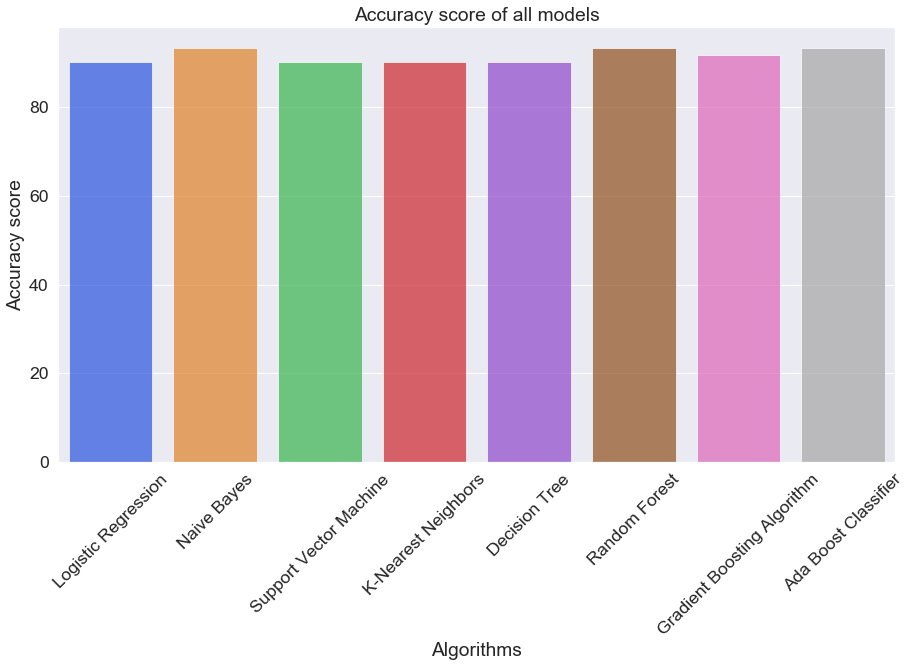

In [28]:
sns.set(rc={'figure.figsize':(15,8)},font_scale=1.6)
plt.title("Accuracy score of all models")
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")
plt.xticks(rotation=45)
sns.barplot(algorithms,scores,palette='bright',alpha=0.675)
plt.show()

# Summary

In this project, Our aim was to predict if a person has a heart disease or not based on attributes blood pressure,heart beat, exang, fbs and others.


We started with the data exploration where we got a feeling for the dataset, checked about missing data and learned which features are important. During this process we used seaborn and matplotlib to do the visualizations. During the data preprocessing part, we converted features into numeric ones, grouped values into categories and created a few new features. Afterwards we started training machine learning models. Lastly, we looked at it’s confusion matrix and computed the models Accuracy and AUC Score.


`It is noted that Random Forest, Ada Boost Classifer, Naive Bayes Classifier Models perform best with an accuracy of 
93.44%`